In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.linear_model import LassoCV, ElasticNet
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ( AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier)
from catboost import CatBoostClassifier
from sklearn import svm

# import lightgbm as lgbm
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
# table format.

In [3]:
data = pd.read_excel("Dry_Bean_Dataset.xlsx")

print("Data set contains {a} rows and {b} columns".format(a=data.shape[0],b=data.shape[1]))


Data set contains 13611 rows and 17 columns


In [4]:
# check for missing values in the data.
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [5]:
# get basic info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
# get basic statistics of numerical columns.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [7]:
data['Class'].describe(include='all')

count        13611
unique           7
top       DERMASON
freq          3546
Name: Class, dtype: object

In [8]:

def histogram_boxplot(feature, figsize=(10,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

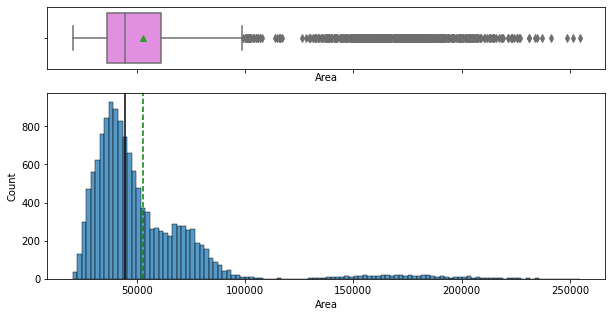

In [9]:
# ditribution of Area
histogram_boxplot(data['Area'])

The Area is right skewed bit lot of max outliers, we can observe few extreme values afer 210000.

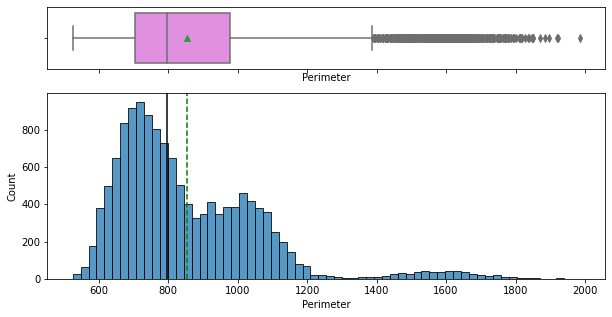

In [10]:
# ditribution of Perimeter
histogram_boxplot(data['Perimeter'])

The Perimeter is right-skewed data with few data points having significantly higher values.

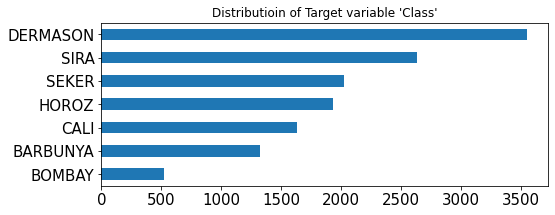

In [11]:
plt.figure(figsize=(8,3))

x = data['Class'].value_counts().sort_values().plot(kind='barh', fontsize= 15)
plt.title("Distributioin of Target variable 'Class'");

### Bivariate and Multivariate data analysis

In [12]:
# function to create box plot. Target variable vs numerical

def box_plt(feature, variable):
    plt.figure(figsize=(15,6)) 
    
    sns.boxplot(feature, x='Class',y=variable, data=data,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^",
                    "markerfacecolor":"white",
                    "markeredgecolor":"black",
                    "markersize":"8"});

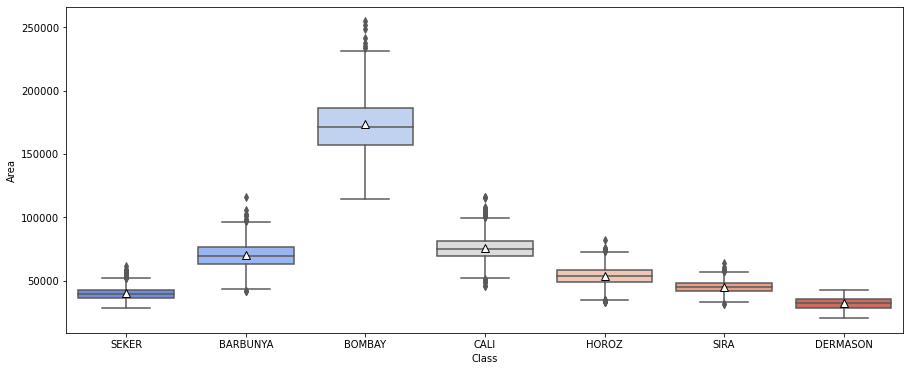

In [13]:
# lets visualize how the target variable corresponds to Area.
box_plt(data["Class"], data['Area'])

Class BOMBAY having higher Area, follwed by Cali and Barbunya. Least Area is for Dermason and Seker.

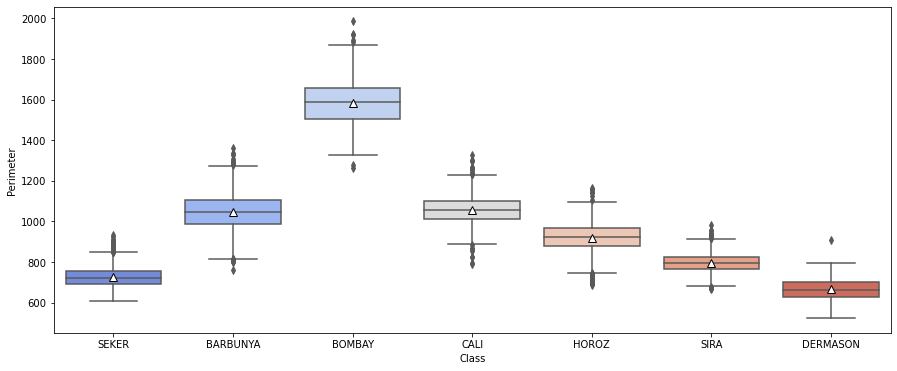

In [14]:
# Visualize how the target variable corresponds to Perimeter.
box_plt(data["Class"], data['Perimeter'])

The patters for Perimeter is quite similar to Area, again Bombay is having higher Perimeter, followed by Barbunya and Cali. Least Perimeter is for Dermason and Seker.

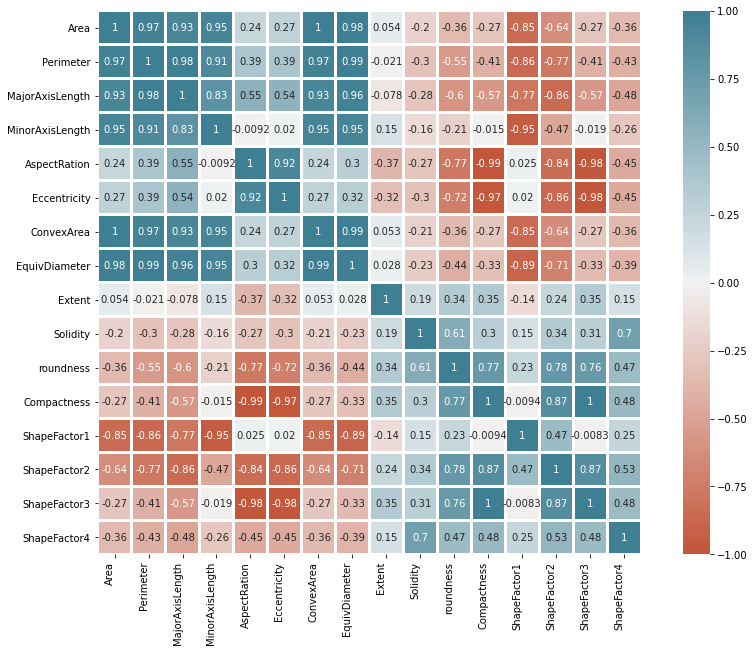

In [15]:
# Correlation plot

plt.figure(figsize=(15,10))
corr = data.corr()
ax = sns.heatmap(data.dropna().corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
                 linecolor='white', linewidths=2, annot = True,square=True)
ax.set_xticklabels( ax.get_xticklabels(), rotation=90, horizontalalignment='right');

### Describing the Scatterplot Matrix

From the above correlation we see majority of the features are having higher positive or negative correlation. As an example, the labels for "Primeter" and and "EquivDiameter", and "ConvexArea" and "EquivDiameter" are highly positive correlated, suggesting there is a relationship between the two variables. However, the labels for "AspectRation" and "Compactness", and "ShapFactor3" and "Eccentricity" are negative correlated, suggesting the higher the number of AspectRation, the lower of Compactness will be.

### Check how the each fetaures are realted to each other with hue as Class


<Figure size 432x288 with 0 Axes>

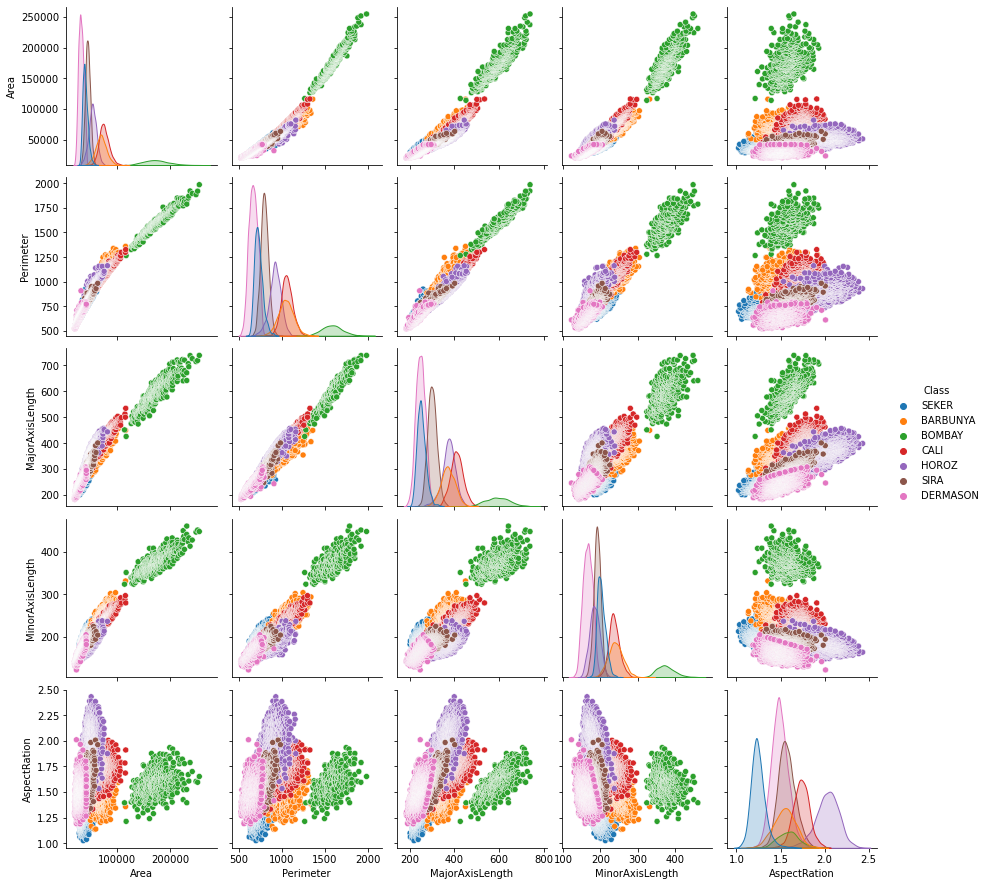

In [16]:
# sns.pairplot(data, hue = 'Class')

# Plot the first 10 columns
plt.figure()
cols_to_plot = data.columns[0:5].tolist() + ['Class'] # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(data[cols_to_plot], hue ="Class")
plt.show()

### Model Building

In [17]:
# transform target variable to encoding
from sklearn.preprocessing import LabelEncoder

# create a copy of the file
df=data.copy()

# creating an instance of label encoder
labelencoder=LabelEncoder()

# assign numerical values and storing it in another column called class_encoder.
df['class_encoder']=labelencoder.fit_transform(df['Class'])

df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,class_encoder
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,5


In [18]:
# this to check the frequncy of Class and Class encoder and their frequencies.
import sidetable
df.stb.freq(['Class','class_encoder'])

,Class,class_encoder,count,percent,cumulative_count,cumulative_percent
0,DERMASON,3,3546,26.052458,3546,26.052458
1,SIRA,6,2636,19.366689,6182,45.419146
2,SEKER,5,2027,14.892366,8209,60.311513
3,HOROZ,4,1928,14.165014,10137,74.476526
4,CALI,2,1630,11.975608,11767,86.452134
5,BARBUNYA,0,1322,9.712732,13089,96.164867
6,BOMBAY,1,522,3.835133,13611,100.000000


In [19]:
# drop the original target variable.
df.drop(['Class'],inplace=True, axis=1)

### Use Robust scaler to standardize the data

In [20]:
# apply Robust scaler
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
rb_df = trans.fit_transform(df)
# convert the array back to a dataframe
scaled_df = pd.DataFrame(rb_df,columns=df.columns)
scaled_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class_encoder
0,-0.650176,-0.674670,-0.720061,-0.450252,-1.287954,-2.270284,-0.643601,-0.750203,0.059567,0.131945,0.883185,1.560992,0.500423,1.429812,1.676249,0.559366,0.666667
1,-0.636618,-0.573361,-0.782186,-0.235466,-1.651251,-3.730295,-0.625735,-0.732625,0.353414,-0.759294,0.045726,2.125093,0.243153,1.839288,2.335906,0.489131,0.666667
2,-0.610782,-0.624178,-0.682331,-0.400660,-1.242389,-2.133671,-0.605485,-0.699413,0.267588,0.293774,0.763127,1.497156,0.436556,1.331896,1.603402,0.641250,0.666667
3,-0.585666,-0.544621,-0.700742,-0.240757,-1.446444,-2.811823,-0.565062,-0.667474,0.334550,-2.668207,0.245116,1.769500,0.270910,1.495976,1.916742,-0.523271,0.666667
4,-0.580387,-0.638706,-0.771446,-0.052265,-1.784287,-4.556475,-0.577064,-0.660804,0.194070,0.601065,1.199915,2.357049,0.037795,1.938967,2.615457,0.665157,0.666667


In [21]:
# Define X and y variables
X = scaled_df.drop(['class_encoder'],axis=1)
y = scaled_df['class_encoder']

# ensure inputs are floats and output is an integer label.
X= X.astype('float32')
y= LabelEncoder().fit_transform(y.astype('str')) 

In [22]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, shuffle=True)

In [23]:
# metrics to evaluate is f1 score with average weighted 
from sklearn.metrics import f1_score, make_scorer
scorer = make_scorer(f1_score, average='weighted')

In [24]:
#  Function to calculate different metric scores of the model - Accuracy, Recall Precision and F1.
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train, average='weighted')
    test_recall = metrics.recall_score(y_test, pred_test, average='weighted')

    train_precision = metrics.precision_score(y_train, pred_train, average='weighted')
    test_precision = metrics.precision_score(y_test, pred_test, average='weighted')
    
    train_f1 = metrics.f1_score(y_train, pred_train, average='weighted')
    test_f1 = metrics.f1_score(y_test, pred_test, average='weighted')

    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train, average='weighted'))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test, average='weighted'))
        print("Precision on training set : ", metrics.precision_score(y_train, pred_train, average='weighted'))
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test, average='weighted'))
        print("f1 on training set : ", metrics.f1_score(y_train, pred_train, average='weighted'))
        print("f1 on test set : ", metrics.f1_score(y_test, pred_test, average='weighted'))


    return score_list  # returning the list with train and test scores

### Build Logistic Model

In [25]:
# build logistic regression model

lg = LogisticRegression(random_state=42, class_weight='balanced')
lg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

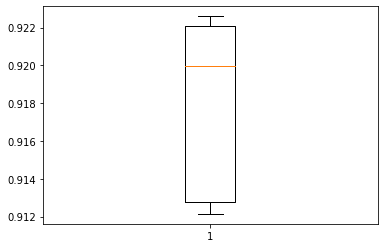

In [26]:
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lg, X=X_train, y=y_train, scoring = scorer, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

Performance on training data varies between 0.916 to 0.927

In [27]:
# predict on X_test
lg_y_pred=lg.predict(X_test)

In [28]:
# Calculating different metrics
lg_score=get_metrics_score(lg)

Accuracy on training set :  0.9185472866589692
Accuracy on test set :  0.921645445641528
Recall on training set :  0.9185472866589692
Recall on test set :  0.921645445641528
Precision on training set :  0.919319823076841
Precision on test set :  0.9224843628598969
f1 on training set :  0.9187195582151068
f1 on test set :  0.9217107580544457


Model produced good genaralized score

In [29]:
# getting data frame labels by lowest to highest.

from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

# labels = data['Class'].unique()
# labels

array([0, 1, 2, 3, 4, 5, 6])

In [30]:
# combine these labels with the confusion matrix
def plot(y_true, y_pred):
    labels= data['Class'].unique()
    column=[f'Predicted {label}' for label in labels]
    indices=[f'Actual {label}' for label in labels]
    table=pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=indices)
    
    return table 

In [31]:
# view confusion matrix table.
plot(y_test, lg_y_pred)

,Predicted SEKER,Predicted BARBUNYA,Predicted BOMBAY,Predicted CALI,Predicted HOROZ,Predicted SIRA,Predicted DERMASON
Actual SEKER,459,0,18,0,8,2,2
Actual BARBUNYA,0,157,0,0,0,0,0
Actual BOMBAY,19,0,366,0,3,1,8
Actual CALI,0,0,0,945,0,25,94
Actual HOROZ,9,0,0,5,556,0,8
Actual SIRA,0,0,7,4,0,584,13
Actual DERMASON,5,0,4,45,24,16,697


In [32]:
# function to create confusion matrix heatmap view.

def plot2(y_true, y_pred):
    plt.figure(figsize=(15,8))
    labels= data['Class'].unique()
    labels.sort()
    column=[f'Predicted {label}' for label in labels]
    indices=[f'Actual {label}' for label in labels]
    table=pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=indices)
    
    return sns.heatmap(table,  fmt='d', cmap='viridis',
                 annot = True, square=True) 


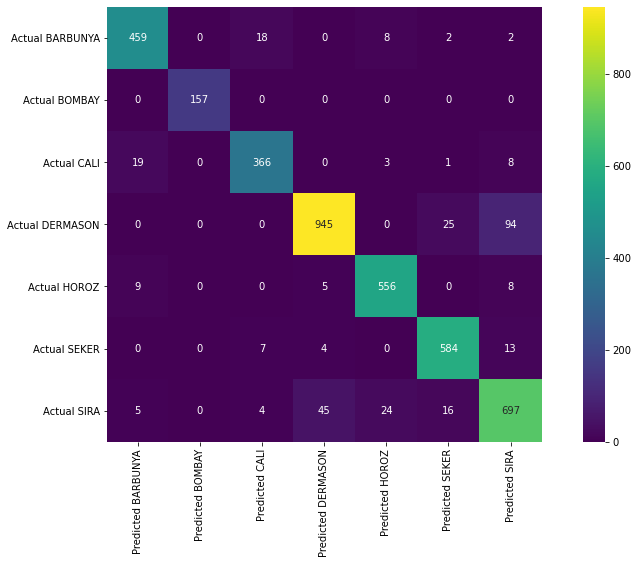

In [33]:
# view confusion matrix heat map
plot2(y_test, lg_y_pred);

In [34]:
# create target label names for classificaiton report
# labels are assigned based on the above side table.
target_labels={'BARBUNYA':0, 'BOMBAY':1, 'CAU':2, 'DERMASON':3, 'HOROZ':4, 'SEKER':5, 'SIRA':6}

In [35]:
# print classification report
print(classification_report(y_test, lg_y_pred,target_names=target_labels))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.94      0.94       489
      BOMBAY       1.00      1.00      1.00       157
         CAU       0.93      0.92      0.92       397
    DERMASON       0.95      0.89      0.92      1064
       HOROZ       0.94      0.96      0.95       578
       SEKER       0.93      0.96      0.94       608
        SIRA       0.85      0.88      0.86       791

    accuracy                           0.92      4084
   macro avg       0.93      0.94      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [36]:
Evaluation=pd.DataFrame(['Logistic Regression'],columns=['Algorithm'])

Evaluation.loc[0,'Precision']=metrics.precision_score(y_test, lg_y_pred, average='weighted')
Evaluation.loc[0,'Recall']=metrics.recall_score(y_test, lg_y_pred, average='weighted')
Evaluation.loc[0,'F1 Score']=metrics.f1_score(y_test, lg_y_pred, average='weighted')
Evaluation.loc[0,'Accuracy']=metrics.accuracy_score(y_test,lg_y_pred)

Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.922484,0.921645,0.921711,0.921645


In [37]:
from sklearn.neighbors import KNeighborsClassifier  

classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)

KNeighborsClassifier()

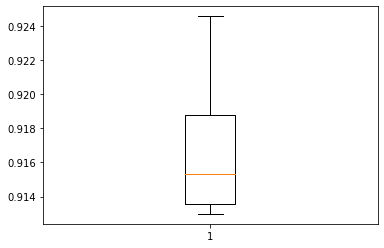

In [38]:
# Let's evaluate the model performance by using KFold and cross_val_score

# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator= classifier, X=X_train, y=y_train, scoring=scorer, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [39]:
#predicting
y_pred=classifier.predict(X_test)

In [40]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       489
           1       1.00      1.00      1.00       157
           2       0.94      0.90      0.92       397
           3       0.92      0.92      0.92      1064
           4       0.96      0.95      0.95       578
           5       0.96      0.96      0.96       608
           6       0.86      0.87      0.87       791

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.94      4084
weighted avg       0.92      0.92      0.92      4084



In [41]:
classifier.score(X_test,y_test)

0.9240940254652301

In [42]:

Evaluation.loc[1,'Algorithm']='KNN'
Evaluation.loc[1,'Precision']=metrics.precision_score(y_test, y_pred, average='weighted')
Evaluation.loc[1,'Recall']=metrics.recall_score(y_test, y_pred, average='weighted')
Evaluation.loc[1,'F1 Score']=metrics.f1_score(y_test, y_pred, average='weighted')
Evaluation.loc[1,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

In [43]:
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.922484,0.921645,0.921711,0.921645
1,KNN,0.924222,0.924094,0.924101,0.924094


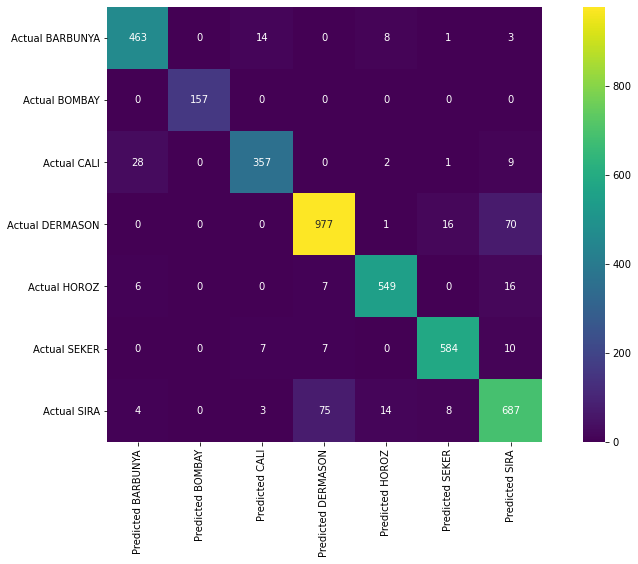

In [44]:
# view confusion matrix heat map
plot2(y_test, y_pred);

In [45]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [46]:
y_pred=classifier.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       489
           1       1.00      1.00      1.00       157
           2       0.93      0.92      0.93       397
           3       0.93      0.92      0.92      1064
           4       0.94      0.95      0.94       578
           5       0.95      0.96      0.96       608
           6       0.87      0.88      0.88       791

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [47]:
# Creating new pipeline with best parameters

svm_gridsearch = make_pipeline(
    RobustScaler(),
    svm.SVC(random_state=42, class_weight='balanced', probability=True, C= 1000, gamma= 0.01, kernel='rbf'))

# Fit the model on training data
svm_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('svc',
                 SVC(C=1000, class_weight='balanced', gamma=0.01,
                     probability=True, random_state=42))])

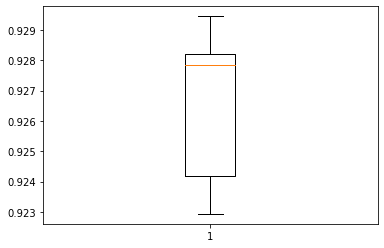

In [48]:
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=svm_gridsearch, X=X_train, y=y_train, scoring=scorer, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [49]:
# predict on X_test
svm_gridsearch_y_pred= svm_gridsearch.predict(X_test)

In [50]:
# Calculating different metrics
svm_gridsearch_score=get_metrics_score(svm_gridsearch)

Accuracy on training set :  0.9341870473391414
Accuracy on test set :  0.9331537708129285
Recall on training set :  0.9341870473391414
Recall on test set :  0.9331537708129285
Precision on training set :  0.9345065347843049
Precision on test set :  0.9340899673513643
f1 on training set :  0.9342931503402925
f1 on test set :  0.9333429816048864


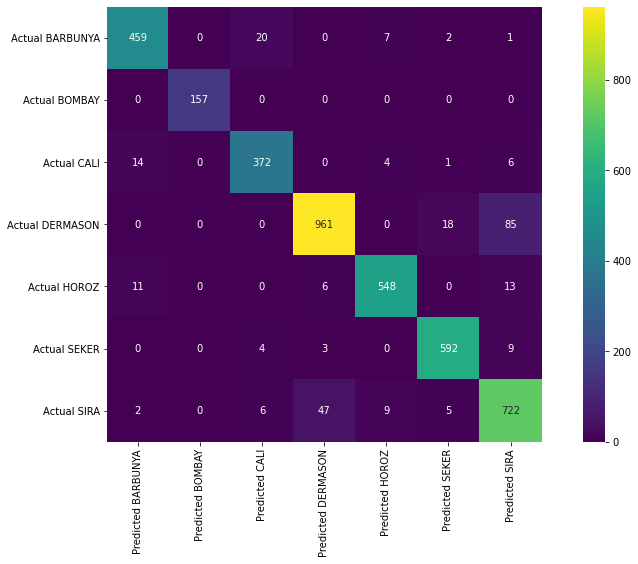

In [51]:
# view confusion matrix heat map
plot2(y_test, svm_gridsearch_y_pred);

In [52]:
Evaluation.loc[2,'Algorithm']='SVM_linear'

Evaluation.loc[2,'Precision']=metrics.precision_score(y_test, y_pred, average='weighted')
Evaluation.loc[2,'Recall']=metrics.recall_score(y_test, y_pred, average='weighted')
Evaluation.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred, average='weighted')
Evaluation.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.922484,0.921645,0.921711,0.921645
1,KNN,0.924222,0.924094,0.924101,0.924094
2,SVM_linear,0.927841,0.927767,0.927768,0.927767


In [53]:
dtree = DecisionTreeClassifier(random_state=42,class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

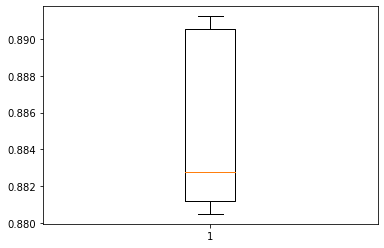

In [54]:

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=dtree, X=X_train, y=y_train, scoring=scorer, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [55]:
# predict on X_test
dtree_y_pred=dtree.predict(X_test)

In [56]:
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8969147894221352
Recall on training set :  1.0
Recall on test set :  0.8969147894221352
Precision on training set :  1.0
Precision on test set :  0.8974277790581483
f1 on training set :  1.0
f1 on test set :  0.8970892581561437


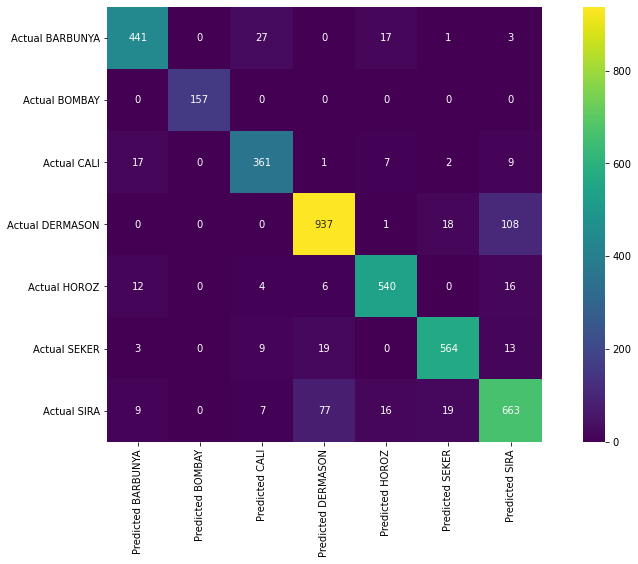

In [57]:
# view confusion matrix heat map
plot2(y_test, dtree_y_pred);

In [58]:
# print classification report
print(classification_report(y_test, dtree_y_pred,target_names=target_labels))

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.90      0.91       489
      BOMBAY       1.00      1.00      1.00       157
         CAU       0.88      0.91      0.90       397
    DERMASON       0.90      0.88      0.89      1064
       HOROZ       0.93      0.93      0.93       578
       SEKER       0.93      0.93      0.93       608
        SIRA       0.82      0.84      0.83       791

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084



In [59]:
Evaluation.loc[3,'Algorithm']='Decision Tree'

Evaluation.loc[3,'Precision']=metrics.precision_score(y_test, dtree_y_pred, average='weighted')
Evaluation.loc[3,'Recall']=metrics.recall_score(y_test, dtree_y_pred, average='weighted')
Evaluation.loc[3,'F1 Score']=metrics.f1_score(y_test, dtree_y_pred, average='weighted')
Evaluation.loc[3,'Accuracy']=metrics.accuracy_score(dtree_y_pred,y_pred )
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.922484,0.921645,0.921711,0.921645
1,KNN,0.924222,0.924094,0.924101,0.924094
2,SVM_linear,0.927841,0.927767,0.927768,0.927767
3,Decision Tree,0.897428,0.896915,0.897089,0.913565
